# <center> Final Project
## Prepared By: Eslam Ahmed Mohammed Ibrahim Elsheikh
### Student ID: 181061

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.Builder().appName('Project').getOrCreate()

In [2]:
from pyspark.sql.functions import *

#### Step 1. Loading the data

In [3]:
file = 'train.csv' 

In [4]:
crime_data = spark.read.csv(file, header = True, inferSchema = True)

some data exploration

In [5]:
#counting the data rows
print('Number of data rows = ', crime_data.count())
print('\n Number of Non NA data rows = ', crime_data.dropna().count()) 

Number of data rows =  878049

 Number of Non NA data rows =  878049


In [6]:
columns  = list(crime_data.columns)
print('Data column names : \n', columns)

Data column names : 
 ['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y']


In [7]:
crime_data.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Category,878049,None,None,ARSON,WEAPON LAWS
Descript,878049,None,None,ABANDONMENT OF CHILD,YOUTH COURT
DayOfWeek,878049,None,None,Friday,Wednesday
PdDistrict,878049,None,None,BAYVIEW,TENDERLOIN
Resolution,878049,None,None,"ARREST, BOOKED",UNFOUNDED
Address,878049,None,None,0 Block of HARRISON ST,ZOE ST / WELSH ST
X,878049,-122.4226164550638,0.03035362299848847,-122.51364206429,-120.5
Y,878049,37.77102029800635,0.4568931047058097,37.7078790224135,90.0


In [8]:
crime_data.summary().toPandas().transpose()

,0,1,2,3,4,5,6,7
summary,count,mean,stddev,min,25%,50%,75%,max
Category,878049,None,None,ARSON,None,None,None,WEAPON LAWS
Descript,878049,None,None,ABANDONMENT OF CHILD,None,None,None,YOUTH COURT
DayOfWeek,878049,None,None,Friday,None,None,None,Wednesday
PdDistrict,878049,None,None,BAYVIEW,None,None,None,TENDERLOIN
Resolution,878049,None,None,"ARREST, BOOKED",None,None,None,UNFOUNDED
Address,878049,None,None,0 Block of HARRISON ST,None,None,None,ZOE ST / WELSH ST
X,878049,-122.4226164550638,0.03035362299848847,-122.51364206429,-122.432951589917,-122.416413527535,-122.406958660602,-120.5
Y,878049,37.77102029800635,0.4568931047058097,37.7078790224135,37.7524273767291,37.775420706711,37.7843677003184,90.0


In [9]:
crime_data.printSchema()

root
 |-- Dates: timestamp (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)



In [10]:
#counting the distinct of each data column to know the expected features
crime_data.select(countDistinct('Category'),countDistinct('Descript')\
                  , countDistinct("PdDistrict"), countDistinct("Address"), countDistinct("Resolution")).toPandas()

#from this result we can exclude the address from the features 

,count(DISTINCT Category),count(DISTINCT Descript),count(DISTINCT PdDistrict),count(DISTINCT Address),count(DISTINCT Resolution)
0,39,879,10,23228,17


#### step2. cleaning and visualization

In [11]:
#adding new features for (hour, month & year) will be used for grouping the data and more useful the dates in feature training
#and data visualization
crime_data = crime_data.withColumn("hour", hour("Dates"))\
.withColumn("month", date_format("Dates", "MMMM"))\
.withColumn("year", year("Dates"))

#### Performing some EDA

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#### EDA1. visualizing the top & least 20 crime by occurance count

In [13]:
category_counts = crime_data.groupBy("Category").agg(count("Category").alias("crime_count_per_category"))\
.orderBy(desc("crime_count_per_category")).toPandas()

In [14]:
x = category_counts.Category
y = category_counts.crime_count_per_category

<Figure size 432x288 with 0 Axes>

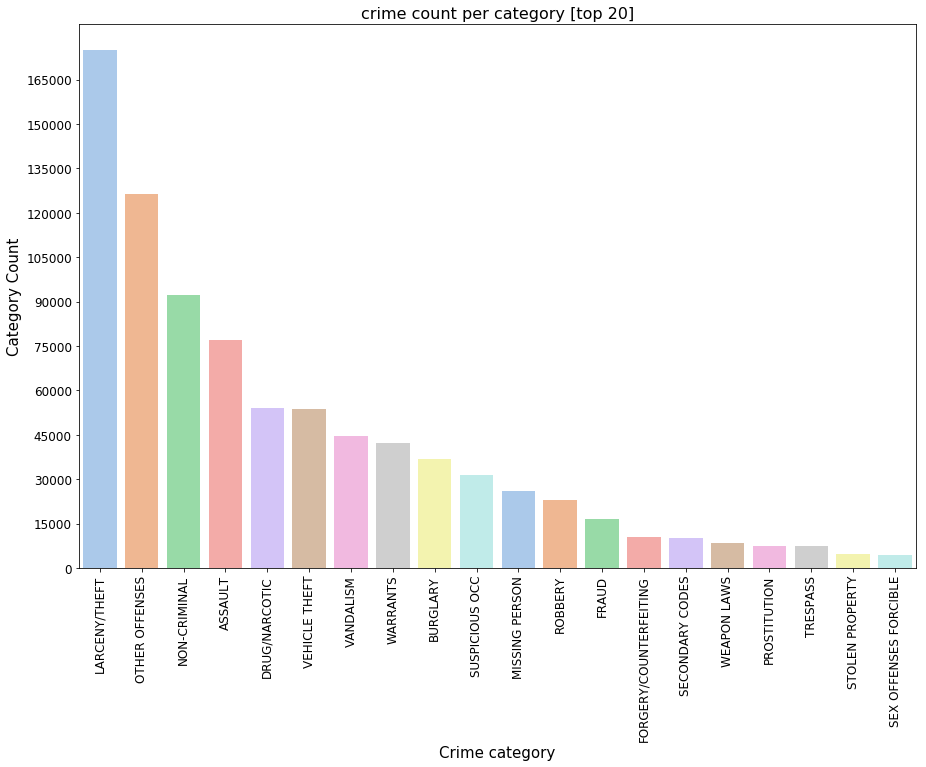

In [15]:
#plotting the top 20 crime categories ordered ascendingly by count of each category
plt.clf()
plt.subplots(figsize=(15,10))
sns.barplot(x[0:20], y[0:20], palette = 'pastel')
#sns.hist(y)
plt.xlabel("Crime category", fontsize = 15)
plt.ylabel("Category Count", fontsize = 15)
plt.title("crime count per category [top 20]", fontsize = 16)
plt.xticks(size = 12, rotation = 90)
plt.yticks(ticks=list(range(0,177000,15000)), size = 12)
plt.show()


<Figure size 432x288 with 0 Axes>

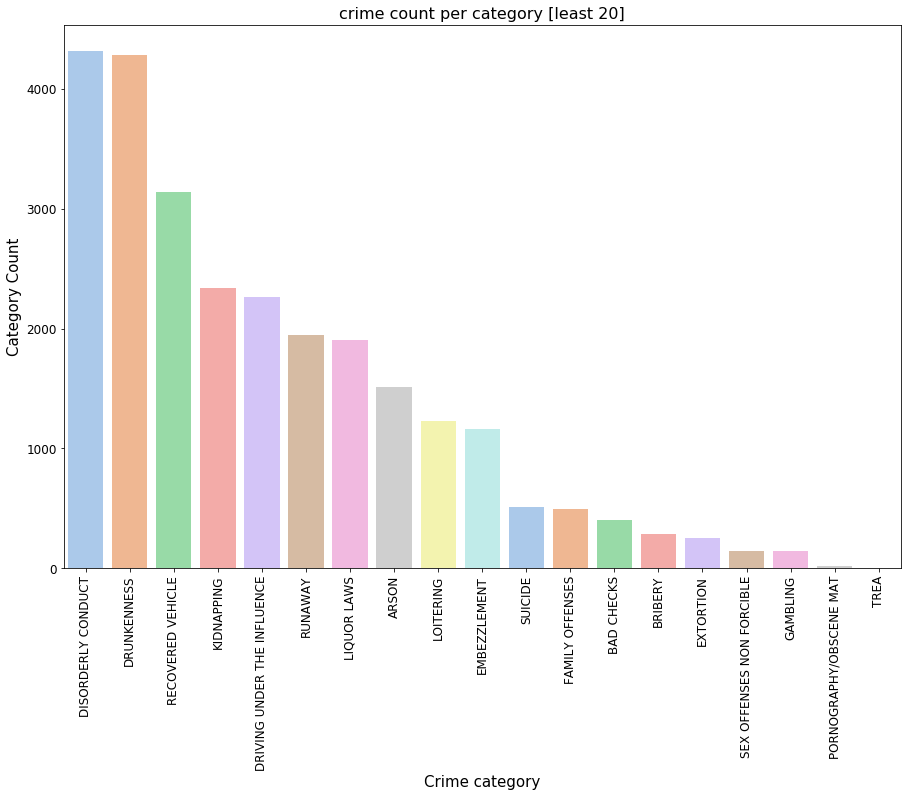

In [16]:
#plotting the least 19 crime categories ordered ascendingly by count of each category

plt.clf()
plt.subplots(figsize=(15,10))
sns.barplot(x[20::], y[20::], palette = 'pastel')
#sns.hist(y)
plt.xlabel("Crime category", fontsize = 15)
plt.ylabel("Category Count", fontsize = 15)
plt.title("crime count per category [least 20]", fontsize = 16)
plt.xticks(size = 12, rotation = 90)
plt.yticks(size = 12)
plt.show()
#display(plt.show())

#### EDA2. visualizing the crime occurances per each year

In [17]:
#per year count
year_counts = crime_data.groupBy("year").agg(count("Category").alias("crime_count_per_year"))\
.orderBy(desc("crime_count_per_year")).toPandas()

In [18]:
x = year_counts.year
y = year_counts.crime_count_per_year

<Figure size 432x288 with 0 Axes>

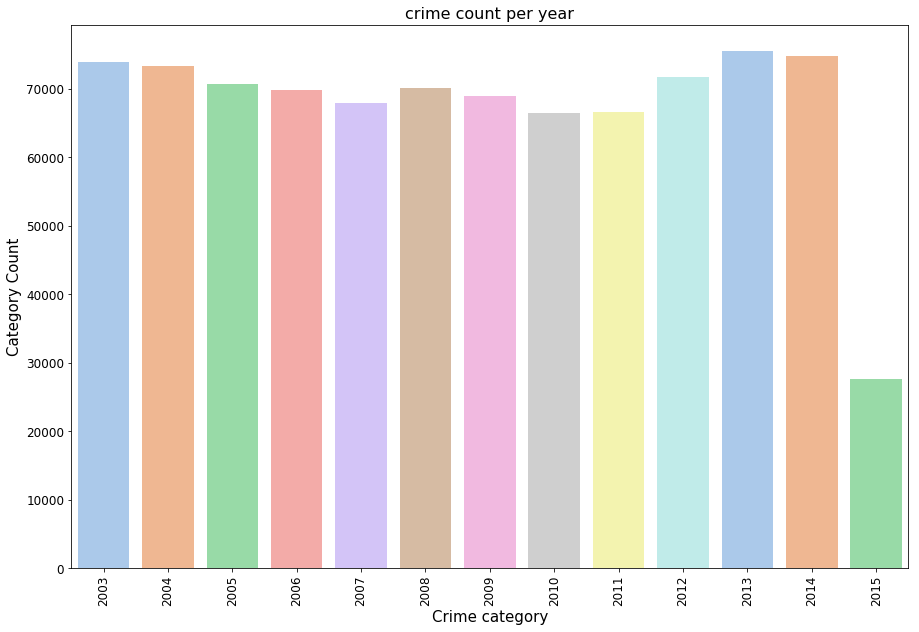

In [19]:
plt.clf()
plt.subplots(figsize=(15,10))
sns.barplot(x, y, palette = 'pastel')
#sns.hist(y)
plt.xlabel("Crime category", fontsize = 15)
plt.ylabel("Category Count", fontsize = 15)
plt.title("crime count per year", fontsize = 16)
plt.xticks(size = 12, rotation = 90)
plt.yticks(size = 12)
plt.show()

#### EDA3. visualizing the crime occurances per each Month

In [20]:
#per Month count
month_count = crime_data.groupBy("month").agg(count("Category").alias("crime_count_per_month"))\
.orderBy(desc("crime_count_per_month")).toPandas()

In [21]:
x = month_count.month
y = month_count.crime_count_per_month

<Figure size 432x288 with 0 Axes>

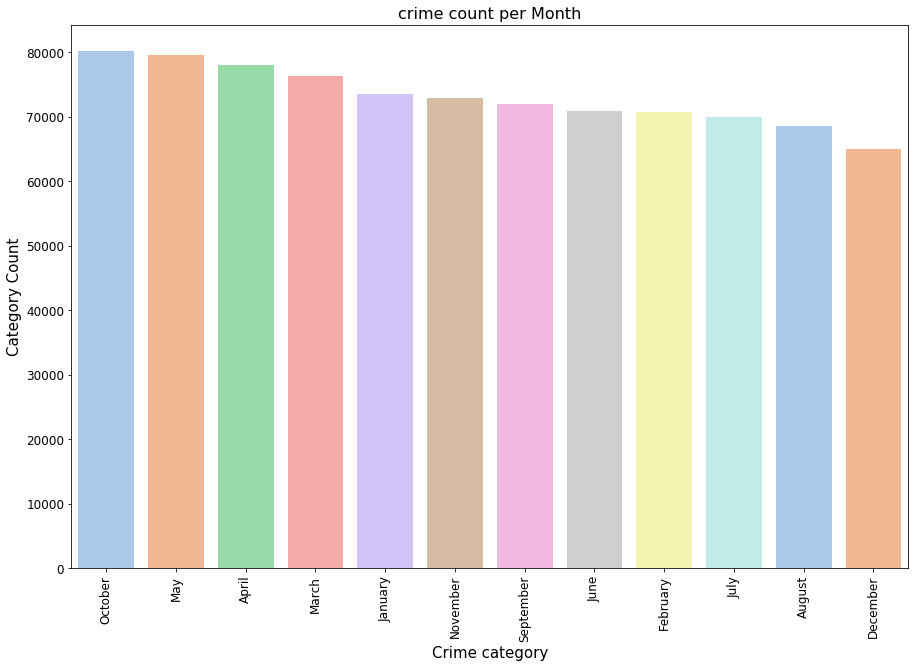

In [22]:
plt.clf()
plt.subplots(figsize=(15,10))
sns.barplot(x, y, palette= 'pastel')
#sns.hist(y)
plt.xlabel("Crime category", fontsize = 15)
plt.ylabel("Category Count", fontsize = 15)
plt.title("crime count per Month", fontsize = 16)
plt.xticks(size = 12, rotation = 90)
plt.yticks(size = 12)
plt.show()

#### EDA4. visualizing the crime occurances per each Day

In [23]:
#per day count
day_count = crime_data.groupBy("DayOfWeek").agg(count("Category").alias("crime_count_per_day"))\
.orderBy(desc("crime_count_per_day")).toPandas()

In [24]:
x = day_count.DayOfWeek
y = day_count.crime_count_per_day

<Figure size 432x288 with 0 Axes>

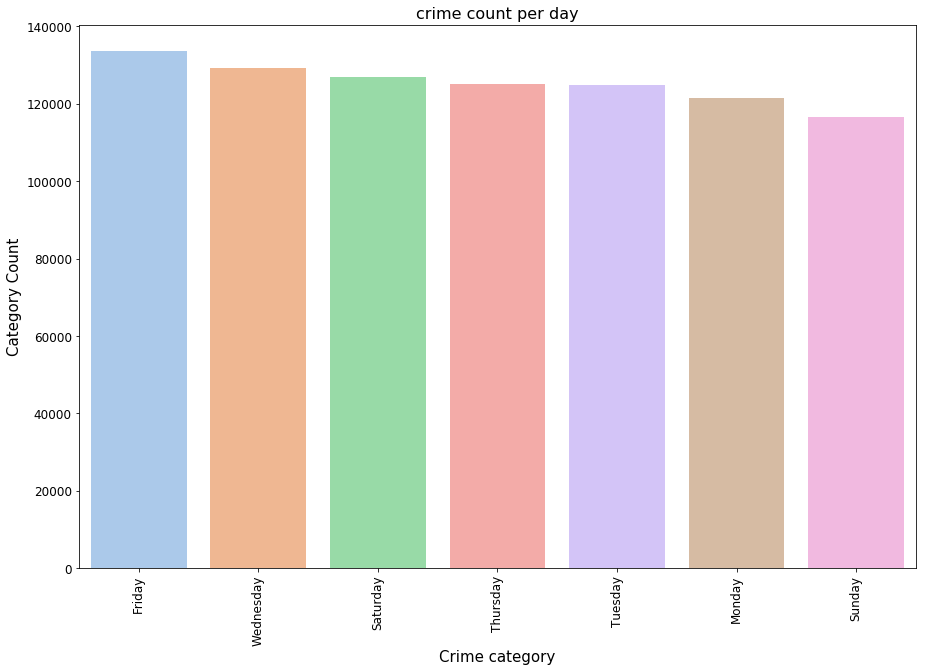

In [25]:
plt.clf()
plt.subplots(figsize=(15,10))
sns.barplot(x, y, palette= 'pastel')
#sns.hist(y)
plt.xlabel("Crime category", fontsize = 15)
plt.ylabel("Category Count", fontsize = 15)
plt.title("crime count per day", fontsize = 16)
plt.xticks(size = 12, rotation = 90)
plt.yticks(size = 12)
plt.show()

In [26]:
crime_data.printSchema()

root
 |-- Dates: timestamp (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- year: integer (nullable = true)



**adding new label (numeric format) column to the data ; will be used in training**

In [27]:
categories = crime_data.select("Category").dropDuplicates().toPandas()

In [28]:
categories['categoryindex'] = list(range(len(categories))) #adding the index column to the pandas category dataframe

In [29]:
categories['categoryindex'] = categories['categoryindex'].astype(basestring)

In [30]:
crime_data = crime_data.withColumn("categoryindex", col("Category"))

In [31]:
#transorming the category string to numeric format
crime_data = crime_data.replace(list(categories.Category), list(categories.categoryindex), 'categoryindex')

In [32]:
crime_data = crime_data.select("*", crime_data.categoryindex.cast("int").alias("label")).drop("categoryindex")

In [33]:
crime_data.printSchema()

root
 |-- Dates: timestamp (nullable = true)
 |-- Category: string (nullable = true)
 |-- Descript: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Resolution: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- label: integer (nullable = true)



#### importing test data

In [34]:
test_data = spark.read.csv('test.csv', header = True, inferSchema = True)

In [35]:
test_data.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Dates: timestamp (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)



In [36]:
#applying same column processing done on training data on the test data
test_data = test_data.withColumn("hour", hour("Dates"))\
.withColumn("month", date_format("Dates", "MMMM"))\
.withColumn("year", year("Dates"))

In [37]:
test_data.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Dates: timestamp (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- PdDistrict: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- X: double (nullable = true)
 |-- Y: double (nullable = true)
 |-- hour: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- year: integer (nullable = true)



#### step 3. selecting the features columns

In [38]:
string_features = ['DayOfWeek', 'PdDistrict', 'month']

In [39]:
numeric_features = ['X', 'Y', 'hour', 'year']

In [40]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler, IndexToString, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [41]:
#labelIndexer = StringIndexer(inputCol ='Category', outputCol = 'labelindex') #converting the target column to index
#lablecoder = OneHotEncoderEstimator(inputCols = ['labelindex'], outputCols = ['label'])

In [42]:
# indexing string feature columns
dayindexer = StringIndexer(inputCol = 'DayOfWeek', outputCol = 'dayofweekindex')
districtindexer = StringIndexer(inputCol = 'PdDistrict', outputCol = 'districtindex')
monthindexer = StringIndexer(inputCol = 'month', outputCol = 'monthindex')

#converting indexed feature columns to One hot ecoded
onehotecoded = OneHotEncoderEstimator(inputCols = ['dayofweekindex', 'districtindex', 'monthindex'],\
                                      outputCols = ['dayofweekvect', 'districtvect', 'monthvect'])

#converting the features columns to 1 feature column using VectorAssembler
vectorassembler = VectorAssembler(inputCols = ['X', 'Y', 'hour', 'year', 'dayofweekvect', 'districtvect', 'monthvect'],\
                                 outputCol= 'assemblerfeatures')

#Scaling the vector assembler result before starting the model training
featurescaler = StandardScaler(inputCol = 'assemblerfeatures', outputCol = 'features')

#### training model 1
##### Randomforest classifier
**Valiable Parameters trials numTrees = [10, 20, 30]**

In [43]:
# Train a RandomForest model
# numTrees=10.
rf1 = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=10)

# numTrees = 20
rf2 = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=20)

# numTrees = 30
rf3 = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=30)

In [44]:
#labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel")

In [45]:
# Chain indexers and model in a Pipeline
pipeline1 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, rf1])

pipeline2 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, rf2])

pipeline3 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, rf3])

In [46]:
#train the model numtree=10
model1 = pipeline1.fit(crime_data)

#train the model numtree=20
model2 = pipeline2.fit(crime_data)

#train the model numtree=30
model3 = pipeline3.fit(crime_data)

In [47]:
# Make predictions numTree = 10
predictions1 = model1.transform(test_data)

# Make predictions numTree = 20
predictions2 = model2.transform(test_data)

# Make predictions numTree = 30
predictions3 = model3.transform(test_data)

In [48]:
print('prediction1 size = ', predictions1.count())
print('prediction2 size = ', predictions2.count())
print('prediction3 size = ', predictions3.count())

prediction1 size =  884262
prediction2 size =  884262
prediction3 size =  884262


#### Training Model 2. 
##### LogisticRegression
**Variable parameters regparam = [1, 0.1, 0.01]**

In [49]:
# Train a Logistic Regression model
# regparam=1
lr1 = LogisticRegression(regParam=1)

# regparam=0.1
lr2 = LogisticRegression(regParam=0.1)

# regparam=0.01
lr3 = LogisticRegression(regParam=0.01)

In [50]:
# Chain indexers and model in a Pipeline
pipeline4 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, lr1])

pipeline5 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, lr2])

pipeline6 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, lr3])

In [51]:
#train the model regparam=1
model4 = pipeline4.fit(crime_data)

#train the model regparam=0.1
model5 = pipeline5.fit(crime_data)

#train the model regparam=0.01
model6 = pipeline6.fit(crime_data)

In [52]:
# Make predictions regparam=1
predictions4 = model4.transform(test_data)

# Make predictions regparam=0.1
predictions5 = model5.transform(test_data)

# Make predictions regparam=0.01
predictions6 = model6.transform(test_data)

In [53]:
print('prediction4 size = ', predictions4.count())
print('prediction5 size = ', predictions5.count())
print('prediction6 size = ', predictions6.count())

prediction4 size =  884262
prediction5 size =  884262
prediction6 size =  884262


#### Training Model 3. 
##### DecisionTreeClassifier
**Variable parameters maxDepth = [2, 5, 10]**

In [54]:
# Train a DecisionTreeClassifier model
# maxDepth=2
dt1 = DecisionTreeClassifier(maxDepth=2)

# maxDepth=5
dt2 = DecisionTreeClassifier(maxDepth=5)

# maxDepth=10
dt3 = DecisionTreeClassifier(maxDepth=10)

In [55]:
# Chain indexers and model in a Pipeline
pipeline7 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, dt1])

pipeline8 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, dt2])

pipeline9 = Pipeline(stages=[dayindexer, districtindexer, monthindexer, onehotecoded, vectorassembler, featurescaler, dt3])

In [56]:
#train the model maxDepth=2
model7 = pipeline7.fit(crime_data)

#train the model maxDepth=5
model8 = pipeline8.fit(crime_data)

#train the model maxDepth=10
model9 = pipeline9.fit(crime_data)

In [57]:
# Make predictions regparam=1
predictions7 = model7.transform(test_data)

# Make predictions regparam=0.1
predictions8 = model8.transform(test_data)

# Make predictions regparam=0.01
predictions9 = model9.transform(test_data)

In [58]:
print('prediction7 size = ', predictions7.count())
print('prediction8 size = ', predictions8.count())
print('prediction9 size = ', predictions9.count())

prediction7 size =  884262
prediction8 size =  884262
prediction9 size =  884262


**Transforming the predictions probabilities to match the submission format**

In [96]:
# features list for naming the submit dataframe
features = ["Id", 'ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD',
'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES',
'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']
len(features)

40

In [97]:
# function to convert the Id, Probability vctor column to a dataframe
def convert(row):
    return (row.Id, ) + tuple(row.vec.toArray().tolist())

**random Forest predictions transformation**


In [98]:
#randomforest numtrees = 10
pred1 = predictions1.select('Id','probability').toDF(*['Id','vec'])

In [99]:
submit1 = pred1.rdd.map(convert).toDF(features) #randomforest numtrees = 10

In [100]:
submit1.count() #randomforest numtrees = 10

884262

In [101]:
#randomforest numtrees = 10
submit1.coalesce(1).write.csv("rf_numtree_10", header = True) #saving results locally 

In [104]:
#randomforest numtrees = 20
pred2 = predictions2.select('Id','probability').toDF(*['Id','vec'])
submit2 = pred2.rdd.map(convert).toDF(features) #randomforest numtrees = 20
#randomforest numtrees = 20
submit2.coalesce(1).write.csv("rf_numtree_20", header = True) #saving results locally 

In [105]:
#randomforest numtrees = 30
pred3 = predictions3.select('Id','probability').toDF(*['Id','vec'])
submit3 = pred2.rdd.map(convert).toDF(features) #randomforest numtrees = 30
#randomforest numtrees = 30
submit3.coalesce(1).write.csv("rf_numtree_30", header = True) #saving results locally 

**LogisticRegression predictions transformation**

In [106]:
#Logisticregression regparam = 1
pred4 = predictions4.select('Id','probability').toDF(*['Id','vec'])
submit4 = pred4.rdd.map(convert).toDF(features) 
submit4.coalesce(1).write.csv("lr_regparam_1", header = True) #saving results locally 

In [107]:
#Logisticregression regparam = 0.1
pred5 = predictions5.select('Id','probability').toDF(*['Id','vec'])
submit5 = pred5.rdd.map(convert).toDF(features) 
submit5.coalesce(1).write.csv("lr_regparam_0.1", header = True) #saving results locally 

In [108]:
#Logisticregression regparam = 0.01
pred6 = predictions6.select('Id','probability').toDF(*['Id','vec'])
submit6 = pred6.rdd.map(convert).toDF(features) 
submit6.coalesce(1).write.csv("lr_regparam_0.01", header = True) #saving results locally 

**DecisionTree Predictions Transformation**

In [109]:
#decisiontree maxdepth = 2
pred7 = predictions7.select('Id','probability').toDF(*['Id','vec'])
submit7 = pred7.rdd.map(convert).toDF(features) 
submit7.coalesce(1).write.csv("DT_maxdepth_2", header = True) #saving results locally 

In [110]:
#decisiontree maxdepth = 5
pred8 = predictions8.select('Id','probability').toDF(*['Id','vec'])
submit8 = pred8.rdd.map(convert).toDF(features) 
submit8.coalesce(1).write.csv("DT_maxdepth_5", header = True) #saving results locally 

In [111]:
#decisiontree maxdepth = 10
pred9 = predictions9.select('Id','probability').toDF(*['Id','vec'])
submit9 = pred9.rdd.map(convert).toDF(features) 
submit9.coalesce(1).write.csv("DT_maxdepth_10", header = True) #saving results locally 